# Membuat Classifier nya

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Reshape, LSTM, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = (100, 100)
BATCH_SIZE = 16
INPUT_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = 3  # Ganti dengan jumlah kelas yang sesuai

## Defiine params and lib

In [3]:
# !git clone https://github.com/rivaelsagala/project-PM-kel-05.git

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Membuat dataset generatornya dan mendefenisikan data Generatornya

### Augmentasi Data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,  # Meningkatkan variasi data
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4]
)


validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

## Mendefinisikan asal folder sumber file berasal

In [6]:
# Directories (Adjust paths as needed)
train_dir = 'dataset/train/'
val_dir = 'dataset/valid/'
test_dir = 'dataset/test/'

# Load Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Update NUM_CLASSES based on data
NUM_CLASSES = train_generator.num_classes
labels = train_generator.class_indices.keys()


Found 3168 images belonging to 3 classes.
Found 297 images belonging to 3 classes.
Found 153 images belonging to 3 classes.


In [7]:
labels

dict_keys(['mujahir', 'red_devil', 'sepat'])

# Mengubah generator data Python Menjadi dataset TensorFlow

agar dapat digunakan dalam pipeline pelatihan, validasi, atau pengujian model secara efisien. Dengan ini, data dapat diproses dalam batch kecil langsung dari generator, mendukung augmentasi, dan tetap hemat memori.

In [8]:
# Define TF Data Generator
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, input_shape[0], input_shape[1], input_shape[2]], [None, num_class])
    )
    return tf_generator

train_data = tf_data_generator(train_generator, INPUT_SHAPE)
val_data = tf_data_generator(validation_generator, INPUT_SHAPE)
test_data = tf_data_generator(test_generator, INPUT_SHAPE)


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [9]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),

#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(3, activation='softmax'),
# ])


# # Kompilasi model
# print('Compiling Model.......')
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# ANN

In [10]:
# Model ANN (Artificial Neural Network)
model = Sequential([
    Input(shape=INPUT_SHAPE),
    Flatten(),
    
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(NUM_CLASSES, activation='softmax')
])


# Summary Model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    30,721,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,385,091 (119.72 MB)

 Trainable params: 31,381,507 (119.71 MB)

 Non-trainable params: 3,584 (14.00 KB)

# Prebuild model

### Build Base Model

In [ ]:
from tensorflow.keras.applications import MobileNet

# get base models
base_model = MobileNet(
    input_shape=INPUT_SHAPE,
    include_top=False,
    weights='imagenet',
    classes=NUM_CLASSES,
)

C:\Users\M S I\AppData\Local\Temp\ipykernel_18916\3140963347.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(


# add to top layer

In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 50, 50, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 50, 50, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 50, 50, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 50, 50, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 51, 51, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 25, 25, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 25, 25, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 25, 25, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 25, 25, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,281,539 (16.33 MB)

 Trainable params: 4,259,651 (16.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

Compiling Model.......


### Build Base model

In [ ]:
# from efficientnet.tfkeras import EfficientNetB1

# # get base models
# base_model = EfficientNetB1(
#     input_shape=input_shape,
#     include_top=False,
#     weights='noisy-student',
#     classes=num_class,
# )

### Add top network layer to models

In [ ]:
# from tensorflow.keras import layers,Sequential
# from tensorflow.keras.models import Model

# #Adding custom layers
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(1024, activation="relu")(x)

# predictions = layers.Dense(num_class, activation="softmax")(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()

# # Compile the model
# print('Compiling Model.......')
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau
# Callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=4,
    verbose=1,
    factor=0.7,
    min_lr=0.00001
)

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# Kompilasi Model
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Summary Model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 50, 50, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 50, 50, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 50, 50, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 50, 50, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 51, 51, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 25, 25, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 25, 25, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 25, 25, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 25, 25, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,281,539 (16.33 MB)

 Trainable params: 4,259,651 (16.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
# Train model

# Pelatihan Model
# Pelatihan Model
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=2,  # Ganti sesuai kebutuhan, lebih banyak epoch
#     steps_per_epoch=len(train_generator),
#     validation_steps=len(validation_generator),
#     callbacks=[learning_rate_reduction, early_stopping]
# )

history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction, early_stopping]
)

Epoch 1/2


c:\Users\M S I\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/198 ━━━━━━━━━━━━━━━━━━━━ 71s 260ms/step - accuracy: 0.8243 - loss: 0.7109 - val_accuracy: 0.9764 - val_loss: 0.1661 - learning_rate: 0.0010
Epoch 2/2
198/198 ━━━━━━━━━━━━━━━━━━━━ 53s 265ms/step - accuracy: 0.9505 - loss: 0.1461 - val_accuracy: 0.9158 - val_loss: 0.3373 - learning_rate: 0.0010


In [ ]:
# Evaluasi Model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9903 - loss: 0.0308
Test Accuracy: 0.99


In [ ]:
history.history['loss']

[0.4054667055606842, 0.14579084515571594]

In [ ]:
history.history['accuracy']

[0.8939393758773804, 0.9488636255264282]

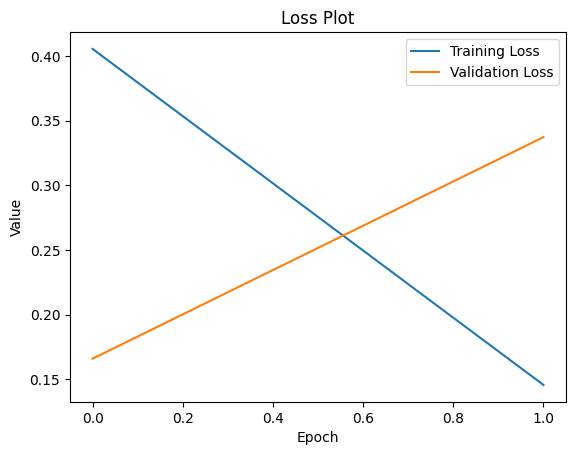

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

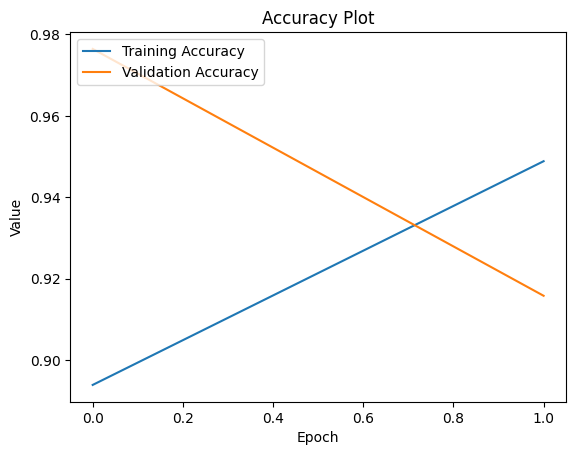

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('C:/Users/M S I/PM/Project-PM/MAIN/model/my_model.keras')  # Menyimpan dalam format HDF5


# MODEL_BASE_PATH = "model"
# PROJECT_NAME = "medium_project"
# SAVE_MODEL_NAME = "model.h5"
# save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

# if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
#     os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
# print('Saving Model At {}...'.format(save_model_path))
# model.save(save_model_path,include_optimizer=False) 


# Evaluate Models

In [ ]:
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')   

Accuracy on training data: 0.9869 
Loss on training data: 0.0407 

Accuracy on test data: 0.9869 
Loss on test data: 0.0407 



## Pengujian Prediksi dengan Model Checkpoint


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


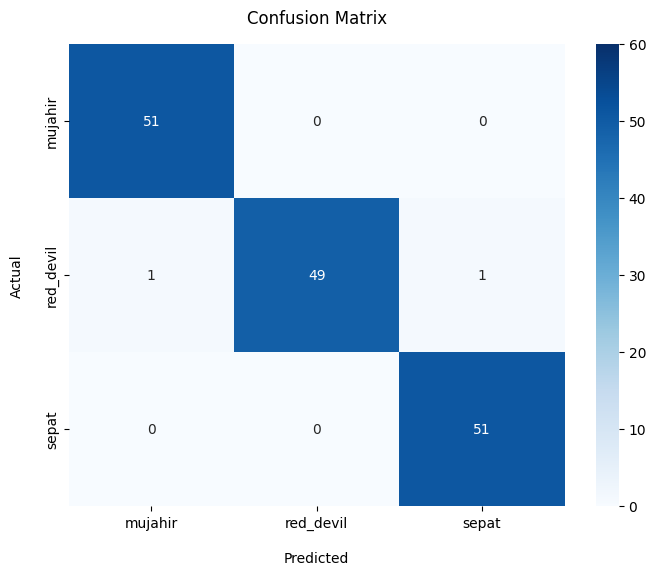

              precision    recall  f1-score   support

     mujahir       0.98      1.00      0.99        51
   red_devil       1.00      0.96      0.98        51
       sepat       0.98      1.00      0.99        51

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



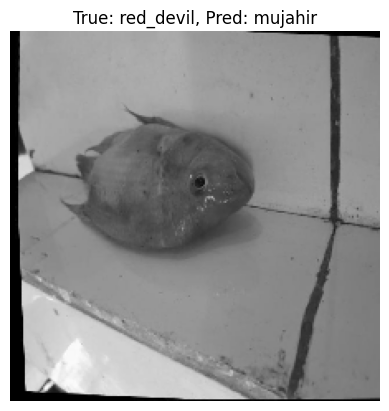

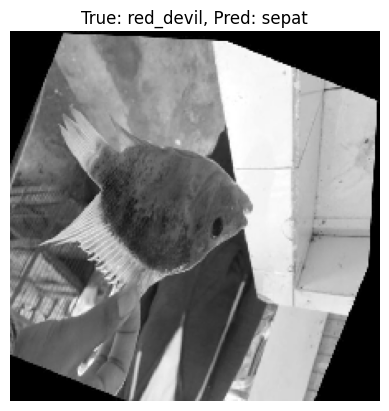

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Muat model checkpoint
checkpoint = load_model('C:/Users/M S I/PM/Project-PM/MAIN/model/my_model.keras')

# Evaluasi model terbaik pada data uji
predictions = checkpoint.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=60)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Identifikasi prediksi yang salah
misclassified_indices = np.where(true_classes != predicted_classes)[0]

# Menampilkan gambar yang diprediksi salah beserta label yang benar dan yang diprediksi
for idx in misclassified_indices:
    # Ambil nama gambar dari generator
    img_path = test_generator.filepaths[idx]  # Nama file gambar dari test_generator
    true_label = class_labels[true_classes[idx]]
    pred_label = class_labels[predicted_classes[idx]]
    
    # Muat dan tampilkan gambar
    img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan ukuran jika diperlukan
    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


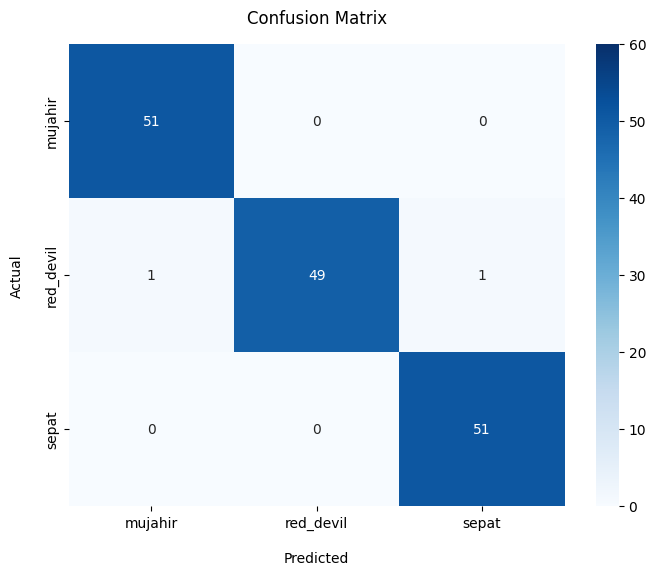

              precision    recall  f1-score   support

     mujahir       0.98      1.00      0.99        51
   red_devil       1.00      0.96      0.98        51
       sepat       0.98      1.00      0.99        51

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Muat model checkpoint
checkpoint = load_model('C:/Users/M S I/PM/Project-PM/MAIN/model/my_model.keras')

# Evaluasi model terbaik pada data uji
predictions = checkpoint.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=60)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

## Pengujian Prediksi dengan Model Pelatihan Keseluruhan (200 Epoch)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step


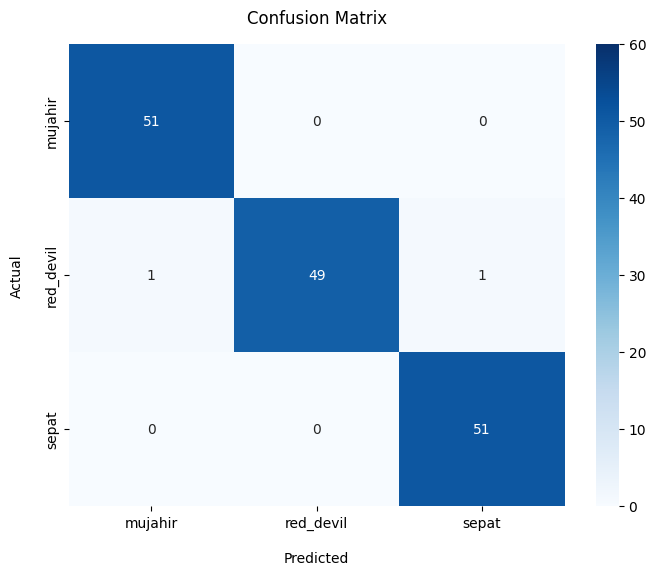

              precision    recall  f1-score   support

     mujahir       0.98      1.00      0.99        51
   red_devil       1.00      0.96      0.98        51
       sepat       0.98      1.00      0.99        51

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi model pada data uji
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Label sebenarnya dari dataset uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Tampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', vmin=0, vmax=60)
plt.xlabel('Predicted', labelpad=15)
plt.ylabel('Actual', labelpad=15)
plt.title('Confusion Matrix', pad=15)
plt.show()

# Mendapatkan metrik evaluasi
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model SavedModel
loaded_model = load_model('C:/Users/M S I/PM/Project-PM/MAIN/model/my_model.keras')

# Menampilkan ringkasan model untuk memastikan berhasil dimuat
# print(loaded_model.summary())


In [ ]:
# def predict_image(img_upload, model = model):
#   img = img_upload
#   img_array = np.asarray(img)
#   img_array = img_array*(1/225)
#   img_input = tf.reshape(img_array, shape = [1, 100, 150, 3])
#   Probability = sorted(model.predict(img_input)[0])[2]
#   predict_class = np.argmax(model.predict(img_input))

#   if predict_class == 0:
#             label = 'mujahir'
#   elif predict_class == 1:
#             label = 'red_devil'
#   else:
#             label = 'sepat'

#   plt.show()
#   print(label)
#   print("Probability: ", round(Probability*100,2), "%")
#   print('\n')

In [ ]:
# !pip install tf-explain



In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tf_explain.core.grad_cam import GradCAM

# # Ambil batch data uji
# x_test, y_test = next(validation_generator)  # Ambil satu batch dari generator validasi

# # Pilih satu sampel untuk dijelaskan
# image = x_test[0:1]  # Gambar pertama
# label = y_test[0:1]  # Label pertama (one-hot encoded)

# # Prediksi model untuk memastikan model telah dipanggil
# predictions = model.predict(image)

# # Dapatkan class_index dari prediksi model
# class_index = np.argmax(predictions[0])  # Indeks kelas yang diprediksi

# # Inisialisasi Grad-CAM
# explainer = GradCAM()

# # Jalankan Grad-CAM
# grid = explainer.explain(
#     validation_data=(image, label),
#     model=model,
#     layer_name='conv2d_3',  # Ganti dengan nama lapisan terakhir konvolusi Anda
#     class_index=class_index
# )

# # Tampilkan hasil
# plt.imshow(grid)
# plt.axis('off')
# plt.show()


In [ ]:
# from tf_explain.core.grad_cam import GradCAM
# import matplotlib.pyplot as plt

# explainer = GradCAM()
# grid = explainer.explain(
#     validation_data=(x_test, y_test),  # Data validasi
#     model=model,
#     layer_name='conv2d_3'             # Nama layer terakhir konvolusi
# )

# plt.imshow(grid)
# plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Muat model yang telah dilatih
model_path = '../model/my_model.keras'  # Ganti dengan path model Anda
loaded_model = load_model(model_path)

def predict_image(img_path, model):
    """
    Memproses gambar dan memprediksi menggunakan model.
    Args:
        img_path (str): Path ke gambar yang akan diprediksi.
        model: Model deep learning yang telah dilatih.
    """
    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=(100, 100))  # Sesuaikan dengan ukuran input model Anda
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar
    
    # Prediksi
    predictions = model.predict(img_array)
    predict_class = np.argmax(predictions[0])  # Ambil kelas dengan probabilitas tertinggi
    probability = np.max(predictions[0])  # Ambil probabilitas tertinggi

    # Map kelas ke label
    labels = ['mujahir', 'red_devil', 'sepat']  # Sesuaikan label dengan model Anda
    label = labels[predict_class]

    # Tampilkan hasil
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}, Probability: {round(probability * 100, 2)}%")
    plt.show()

    print(f"Label: {label}")
    print(f"Probability: {round(probability * 100, 2)}%")

# Path ke gambar
# img_path = 'new_data/2297397025.webp'

# img_path = 'new_data/ikan-red-devil-3137882226.webp'

img_path = 'new_data/Ikan-Sepat.jpg'
# img_path = 'new_data/ikan-tilapia-03.jpeg'

# img_path = 'dataset/test/red_devil/devil.jpg'

# img_path = 'dataset/test/sepat/Sepat-82_png_jpg.rf.e732f4f00346193a2229b0dd0316526e.jpg'
# img_path = 'dataset/test/mujahir/Mujahir-54_jpg.rf.0a1bd3611561768c18524222f9d3183e.jpg'
z
# img_path = 'new_data/ikan-mujair1.jpg'


# img_path = 'new_data/devil.jpg'



# Prediksi gambar
predict_image(img_path, loaded_model)


FileNotFoundError: [Errno 2] No such file or directory: 'new_data/Ikan-Sepat.jpg'